In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy import stats

In [37]:
master = pd.read_csv('Master/train.csv', skip_blank_lines=True)
masterna = pd.read_csv('Master/train.csv', skip_blank_lines=True)
masterna.dropna(axis=0,inplace=True)


#First we do the bar chart for time_signature since it is a categorical discrete variable

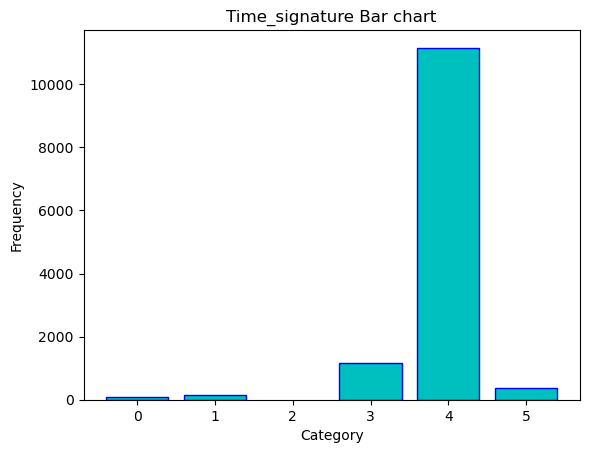

time_signature
4.0    11160
3.0     1162
5.0      375
1.0      149
0.0       92
Name: count, dtype: int64


In [38]:
attri_count = master['time_signature'].value_counts()
plt.bar(attri_count.index, attri_count.values,color = 'c', edgecolor = 'b')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Time_signature Bar chart')
plt.show()
print(attri_count)

In [39]:
last_9_columns = master.iloc[:,-9:]
last_9_columnsna = masterna.iloc[:,-9:]

Scott's Rule first but the mainly used is Sturge rule

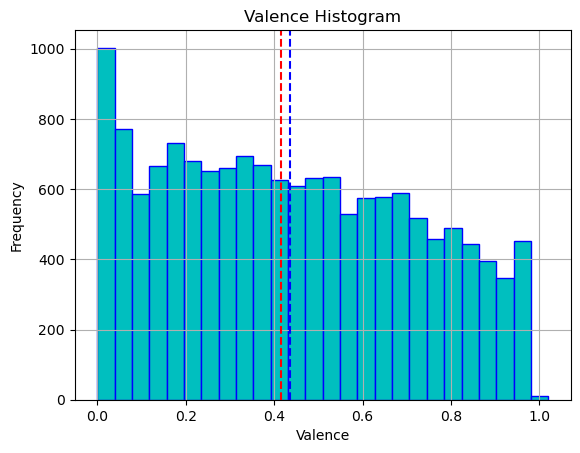

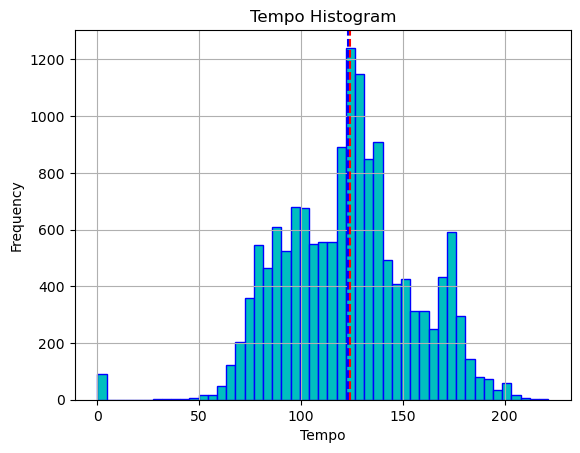

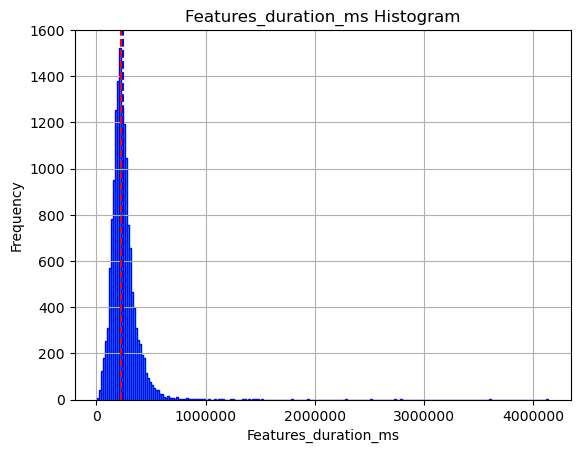

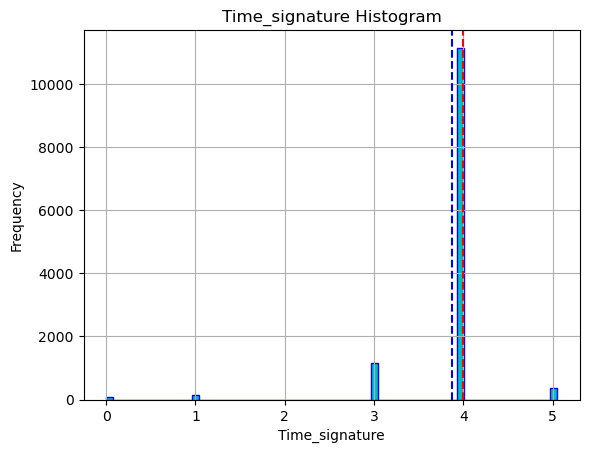

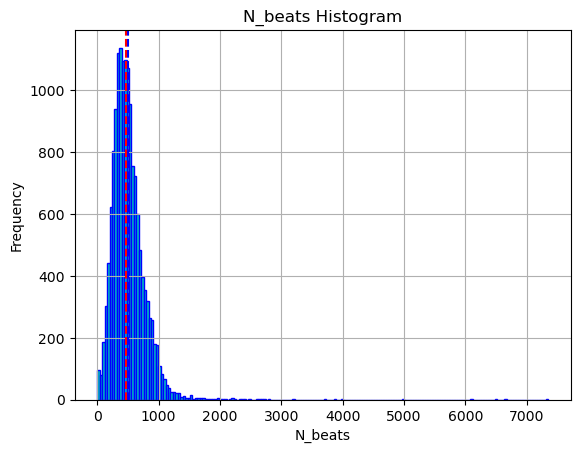

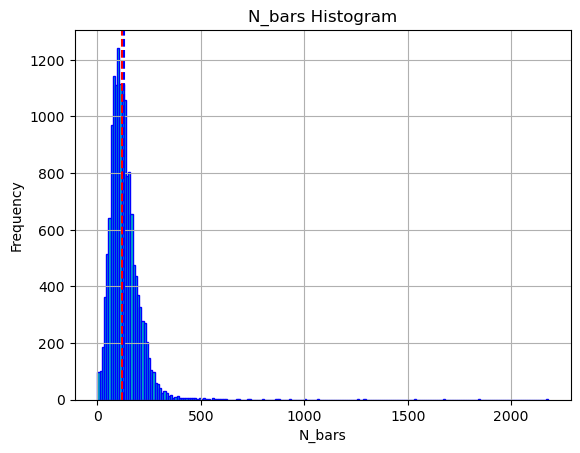

its fine


In [40]:
try:
    for col in last_9_columns.columns:
        if(pd.api.types.is_numeric_dtype(last_9_columns[col])):
            bin_width = 3.49*master[col].std()/(len(master[col])**(1/3))
            master[col].hist(bins = np.arange(min(master[col]), max(master[col]) + bin_width, bin_width), color = 'c', edgecolor = 'b')
            mean_value = master[col].mean()
            #mode_value = master[col].mode()
            median_value = master[col].median()
            plt.ticklabel_format(style='plain', axis='x')
            plt.title(str.capitalize(col) + ' Histogram')
            plt.xlabel(str.capitalize(col))
            plt.ylabel('Frequency')
            plt.axvline(mean_value, color = 'blue', linestyle = 'dashed')
            #plt.axvline(mode_value[0], color='#FF00FF', linestyle = '--')
            plt.axvline(median_value, color = 'red', linestyle = '--')
            plt.show()
except ValueError as e:
    print('its fine')

#We now create the histogram for each of the other vars, with the sturge formula for bining

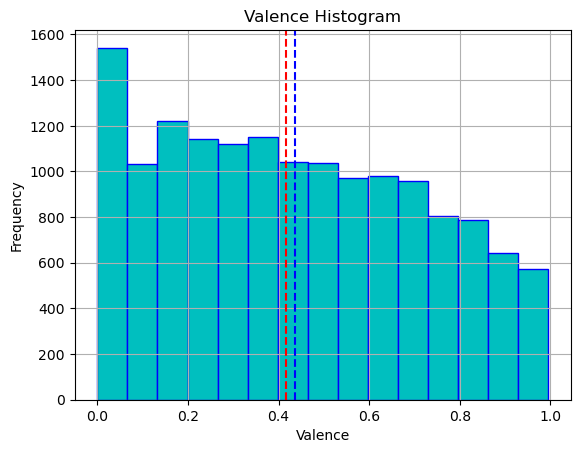

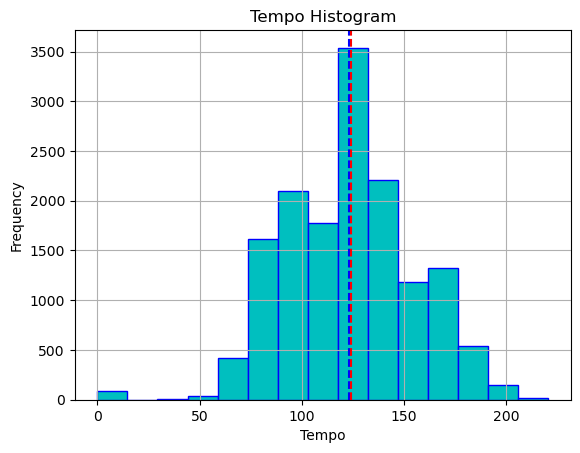

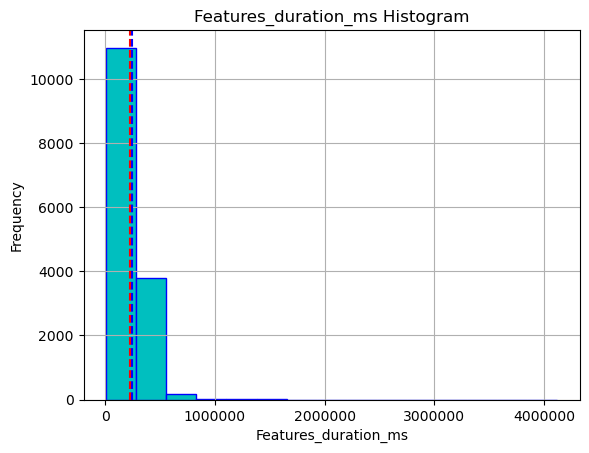

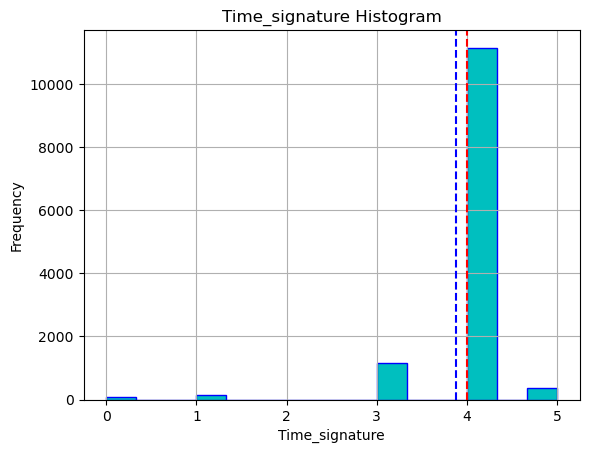

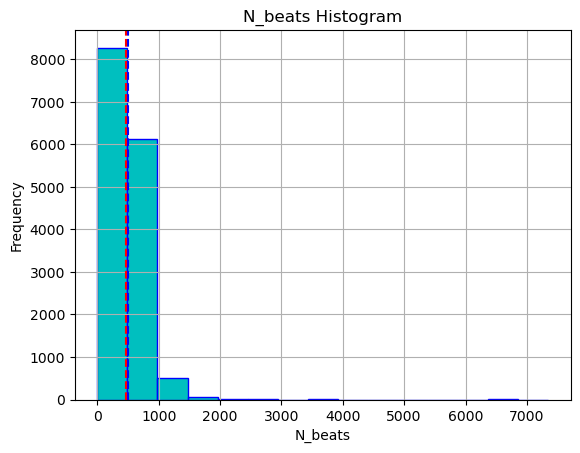

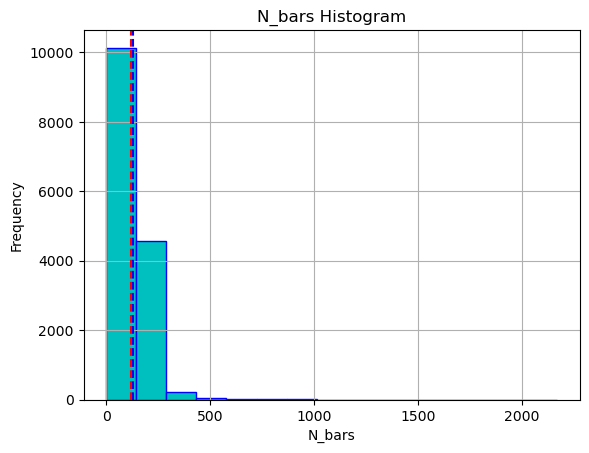

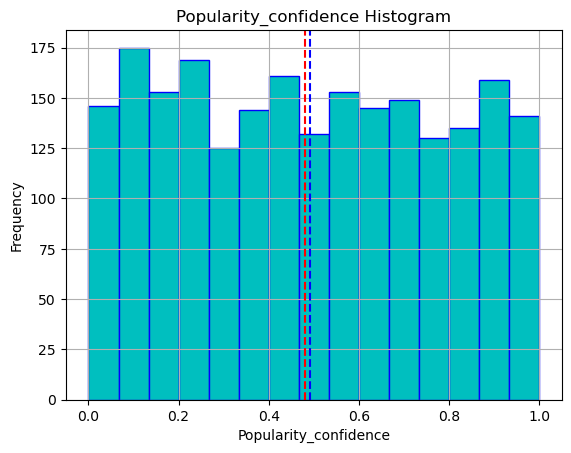

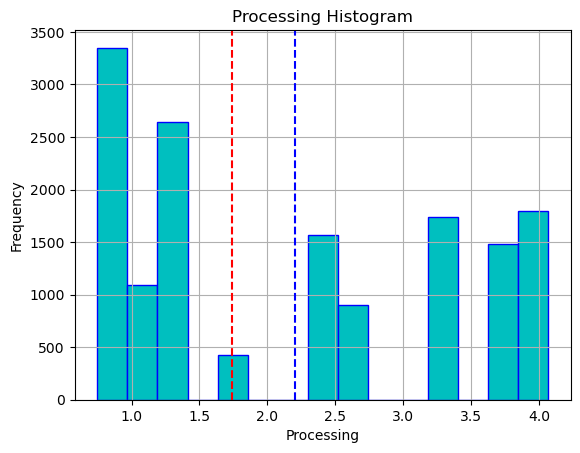

In [41]:
for col in last_9_columns.columns:
    if(pd.api.types.is_numeric_dtype(last_9_columns[col])):
        bins_number = math.ceil(math.log2(last_9_columns[col].size)) + 1
        master[col].hist(bins = bins_number, color = 'c', edgecolor = 'b')
        mean_value = master[col].mean()
        #mode_value = master[col].mode()
        median_value = master[col].median()
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(str.capitalize(col) + ' Histogram')
        plt.xlabel(str.capitalize(col))
        plt.ylabel('Frequency')
        plt.axvline(mean_value, color = 'blue', linestyle = 'dashed')
        #plt.axvline(mode_value[0], color='#FF00FF', linestyle = '--')
        plt.axvline(median_value, color = 'red', linestyle = '--')
        plt.show()

#Now we create the box plots for the vars

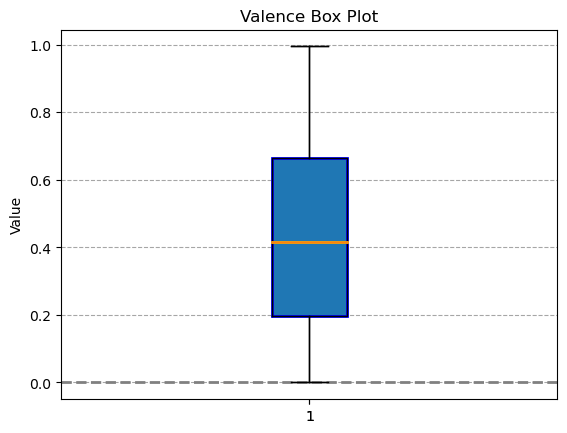

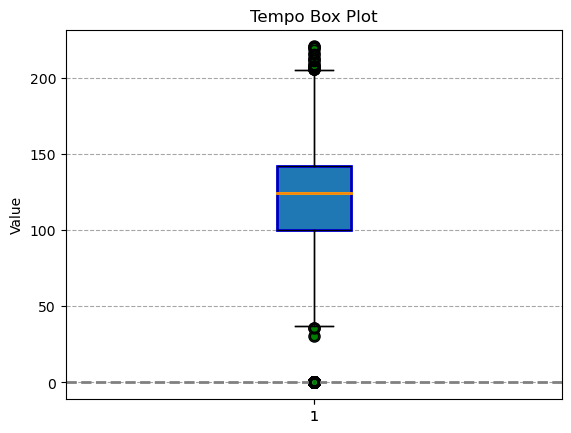

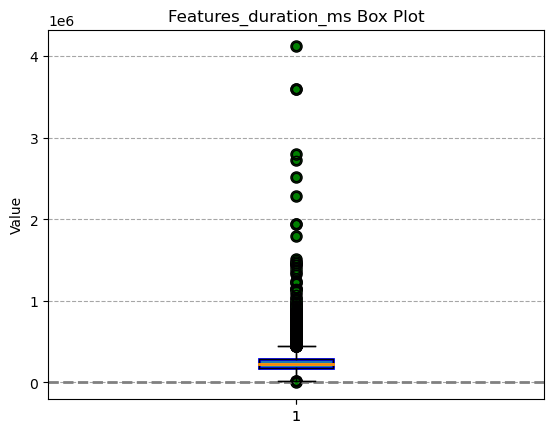

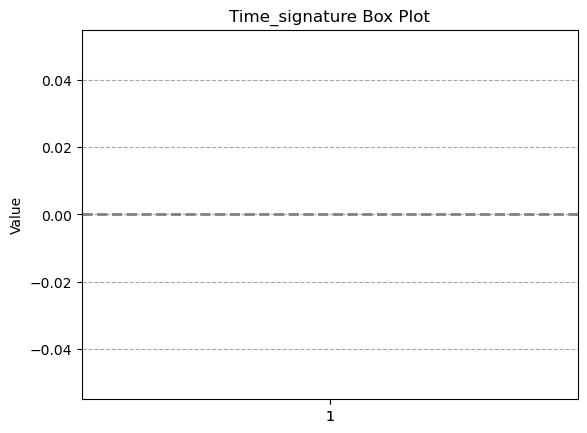

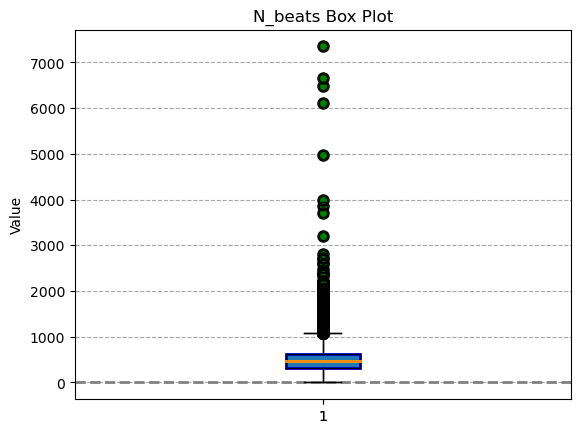

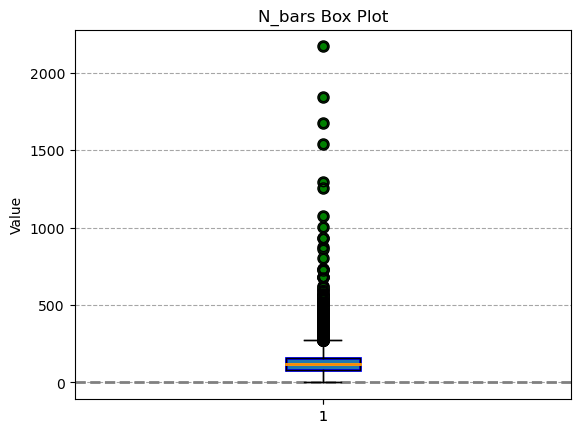

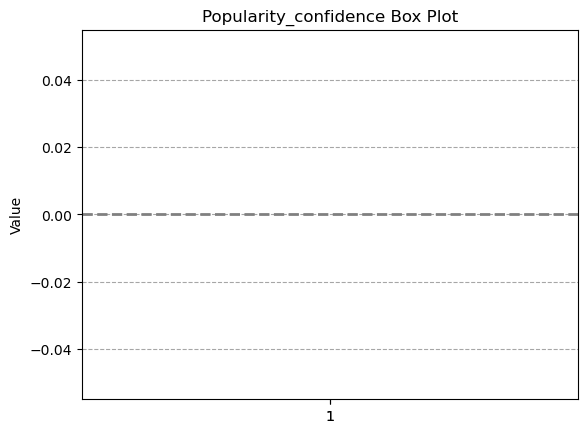

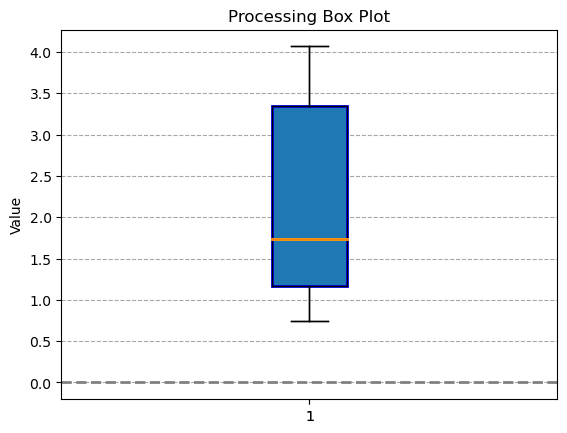

In [42]:
for col in last_9_columns.columns:
    if(pd.api.types.is_numeric_dtype(last_9_columns[col])):
        fig, ax = plt.subplots()
        boxprops = dict(linestyle='--', linewidth=2, color='blue', edgecolor='red')
        flierprops = dict(marker='o', markerfacecolor='green', markersize=8, linestyle='none')
        medianprops = dict(linestyle='-', linewidth=2, color='orange')
        box = ax.boxplot(master[col], patch_artist=True, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
        ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=2)
        plt.boxplot(master[col])
        plt.title(str.capitalize(col) +' Box Plot')
        plt.ylabel('Value')
        plt.show()

#Some variables, specifically time signature and popularity confidence have issue with the box plot due to the quantity of NaNs, If the delete the NaNs, the plot does show

<function matplotlib.pyplot.show(close=None, block=None)>

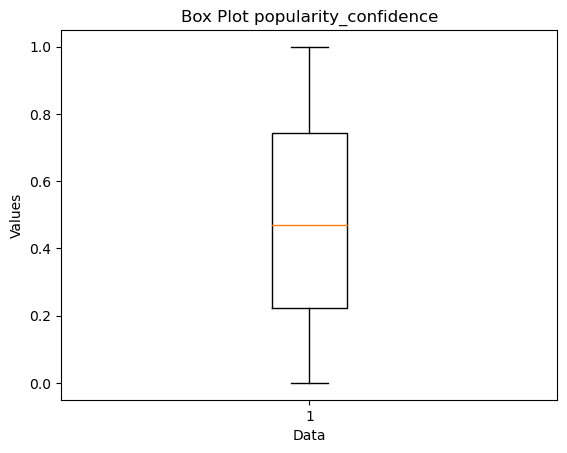

In [43]:

plt.boxplot(masterna['popularity_confidence'])
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot popularity_confidence')
plt.show

#Now we show the z-score for every var

In [44]:

numcols = master.select_dtypes(include=['number']).columns
# Calculate the z-scores for the 'Value' column
for x in numcols:
    z_scores = stats.zscore(master[x])
# Create a new DataFrame with the z-scores
    z_score_df = pd.DataFrame({'Z-Score': z_scores})

    message = "VARIABLE {}".format(x)
    print(message)
    print(z_scores.head(5))
    """ plt.scatter(range(len(z_scores)), z_scores, s=100,alpha=0.7,color=(0,0.2,0.7))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Data Point Index')
    plt.ylabel('Z-Score')
    plt.title('Z-Scores of '+str.capitalize(x))
    plt.show() """

    

VARIABLE duration_ms
0   -0.039437
1    1.540689
2    0.677386
3    0.179643
4    0.475378
Name: duration_ms, dtype: float64
VARIABLE popularity
0    0.999431
1   -1.475429
2   -1.314025
3   -0.237999
4   -0.130396
Name: popularity, dtype: float64
VARIABLE danceability
0    0.715310
1   -2.481888
2   -0.968238
3   -0.144484
4    0.473332
Name: danceability, dtype: float64
VARIABLE energy
0   -0.541799
1   -1.740911
2    0.748097
3   -0.269446
4    0.116388
Name: energy, dtype: float64
VARIABLE key
0   -0.080300
1   -1.196090
2   -0.917142
3   -0.080300
4    0.477595
Name: key, dtype: float64
VARIABLE loudness
0   -0.605102
1   -2.648529
2    0.241441
3    0.547489
4   -0.407120
Name: loudness, dtype: float64
VARIABLE mode
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mode, dtype: float64
VARIABLE speechiness
0    0.158245
1   -0.037820
2   -0.508373
3   -0.083952
4   -0.344602
Name: speechiness, dtype: float64
VARIABLE acousticness
0   -0.005753
1   -0.063412
2   -0.921953
3   -0.72072

VARIABLE duration_ms
0        241760
1        444000
2        333506
3        269800
4        307651
          ...  
14995    432026
14996    182746
14997    400091
14998    197250
14999    198409
Name: duration_ms, Length: 14873, dtype: int64


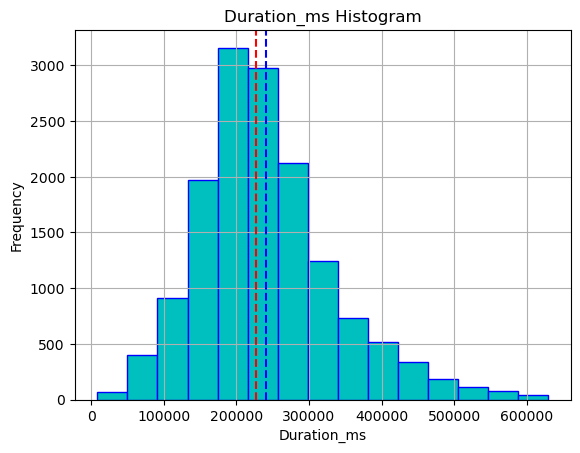

VARIABLE popularity
0        46
1         0
2         3
3        23
4        25
         ..
14995     0
14996    44
14997    43
14998    37
14999    36
Name: popularity, Length: 14993, dtype: int64


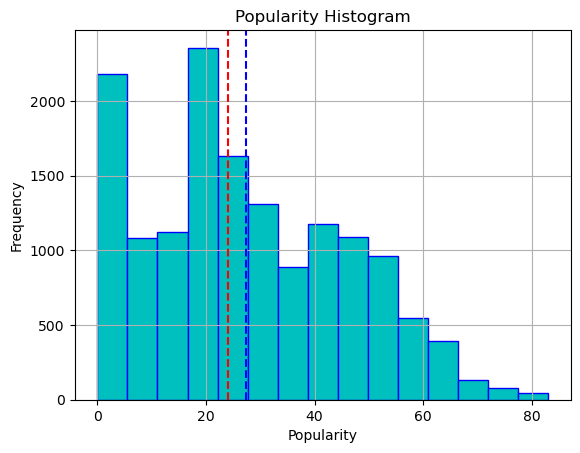

VARIABLE danceability
0        0.690
1        0.069
2        0.363
3        0.523
4        0.643
         ...  
14995    0.554
14996    0.103
14997    0.799
14998    0.511
14999    0.678
Name: danceability, Length: 15000, dtype: float64


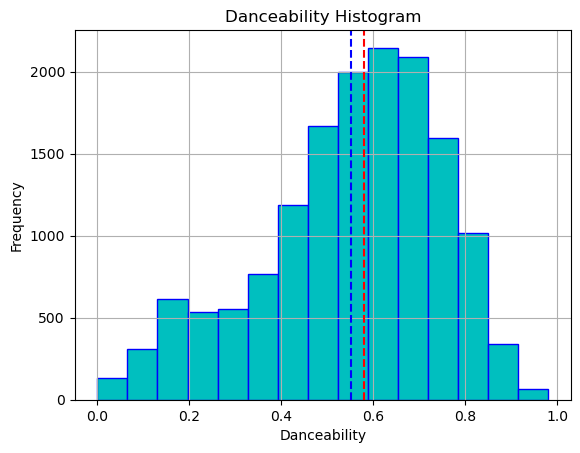

VARIABLE energy
0        0.513
1        0.196
2        0.854
3        0.585
4        0.687
         ...  
14995    0.657
14996    0.860
14997    0.535
14998    0.970
14999    0.518
Name: energy, Length: 15000, dtype: float64


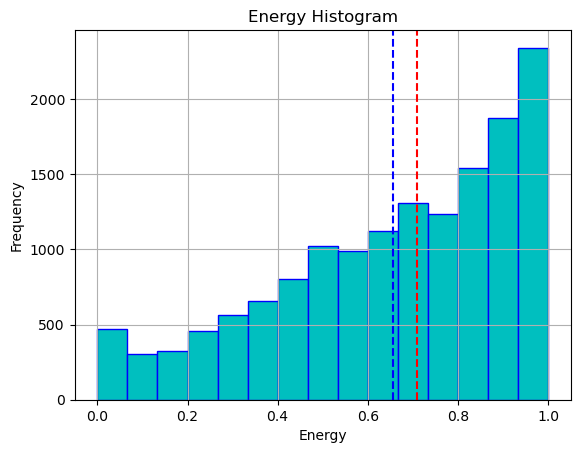

VARIABLE key
0        5
1        1
2        2
3        5
4        7
        ..
14995    1
14996    1
14997    1
14998    5
14999    6
Name: key, Length: 15000, dtype: int64


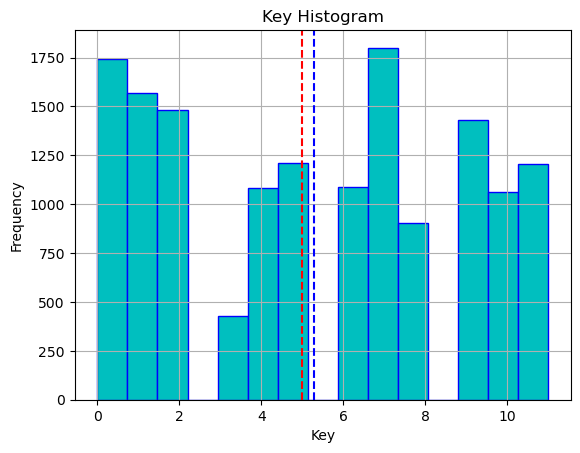

VARIABLE loudness
0       -12.529
1       -24.801
2        -7.445
3        -5.607
4       -11.340
          ...  
14995   -14.232
14996   -19.627
14997    -9.103
14998    -2.299
14999    -7.790
Name: loudness, Length: 14612, dtype: float64


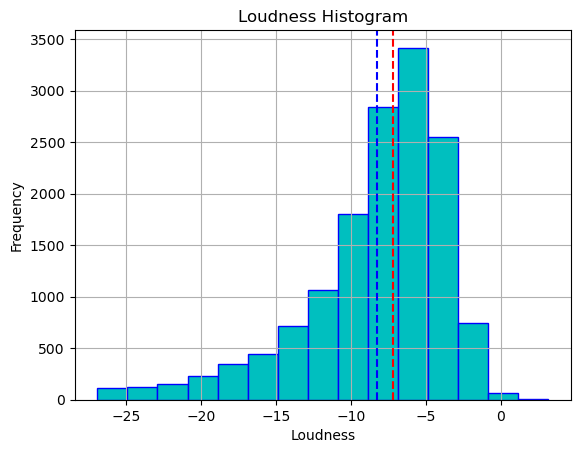

VARIABLE mode
Series([], Name: mode, dtype: float64)
VARIABLE speechiness
0        0.0975
1        0.0805
2        0.0397
3        0.0765
4        0.0539
          ...  
14995    0.0558
14996    0.0595
14997    0.0594
14998    0.0531
14999    0.0352
Name: speechiness, Length: 14580, dtype: float64


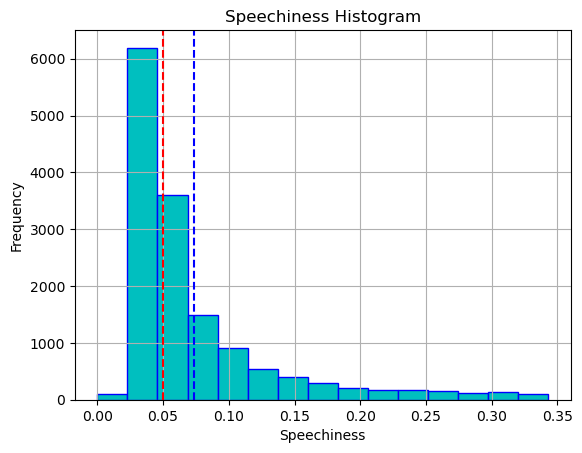

VARIABLE acousticness
0        0.302000
1        0.283000
2        0.000089
3        0.066400
4        0.000576
           ...   
14995    0.016000
14996    0.548000
14997    0.001830
14998    0.000337
14999    0.463000
Name: acousticness, Length: 15000, dtype: float64


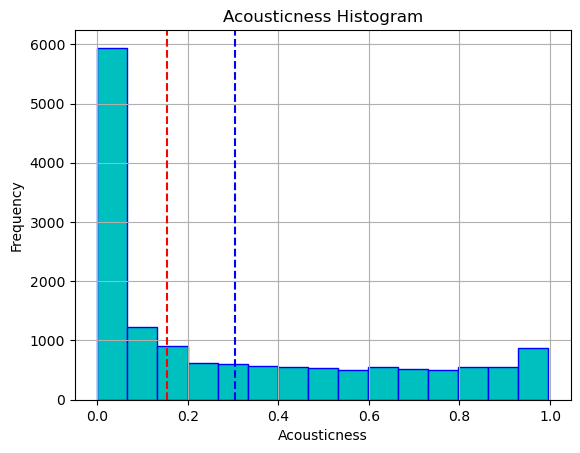

VARIABLE instrumentalness
0        0.536000
1        0.934000
2        0.800000
3        0.001270
4        0.096900
           ...   
14995    0.615000
14996    0.940000
14997    0.857000
14998    0.000014
14999    0.000000
Name: instrumentalness, Length: 15000, dtype: float64


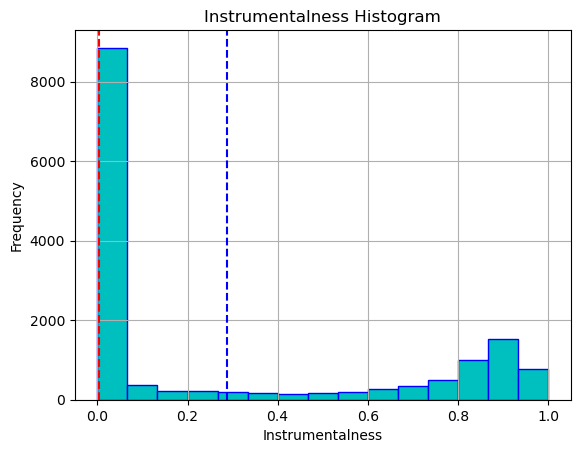

VARIABLE liveness
0        0.2810
1        0.3600
2        0.2620
3        0.1170
4        0.2990
          ...  
14995    0.1320
14996    0.1230
14997    0.0713
14998    0.4020
14999    0.0880
Name: liveness, Length: 14506, dtype: float64


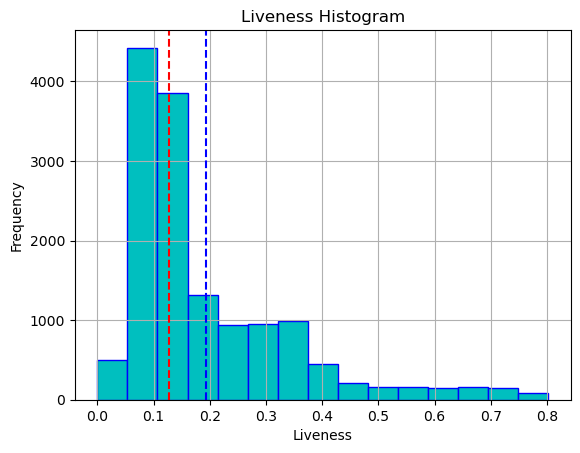

VARIABLE valence
0        0.6350
1        0.0336
2        0.4890
3        0.3850
4        0.6370
          ...  
14995    0.0335
14996    0.0016
14997    0.0708
14998    0.2700
14999    0.7840
Name: valence, Length: 15000, dtype: float64


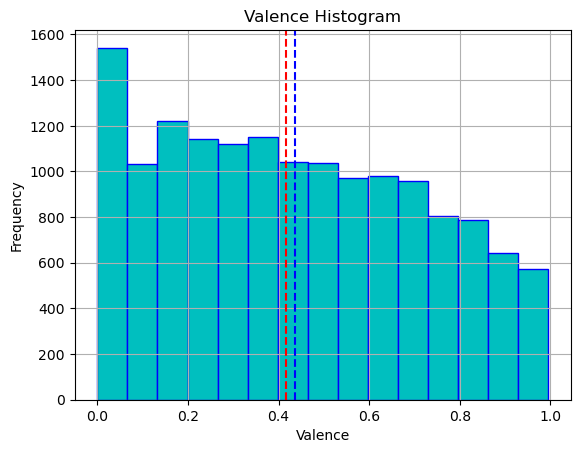

VARIABLE tempo
0        142.221
1         75.596
2        116.628
3        140.880
4        143.956
          ...   
14995    117.319
14996     92.323
14997    126.000
14998    160.044
14999     88.003
Name: tempo, Length: 14906, dtype: float64


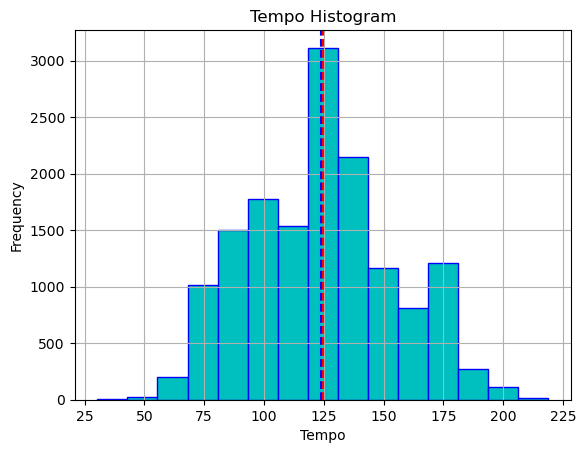

VARIABLE features_duration_ms
0        241760
1        444000
2        333507
3        269800
4        307652
          ...  
14995    432027
14996    182747
14997    400091
14998    197250
14999    198409
Name: features_duration_ms, Length: 14873, dtype: int64


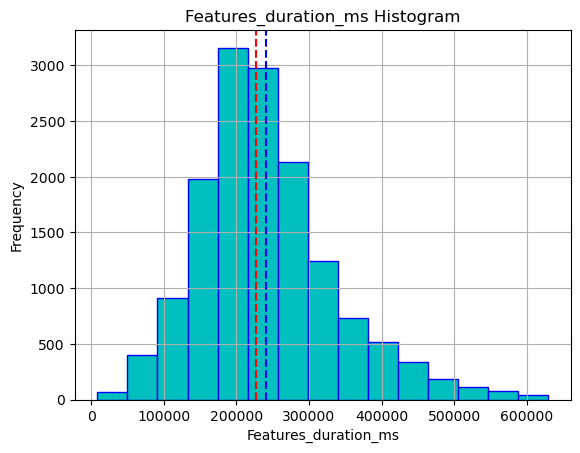

VARIABLE time_signature
Series([], Name: time_signature, dtype: float64)
VARIABLE n_beats
0        567.0
1        617.0
2        652.0
3        619.0
4        733.0
         ...  
14995    837.0
14996    277.0
14997    837.0
14998    513.0
14999    286.0
Name: n_beats, Length: 14880, dtype: float64


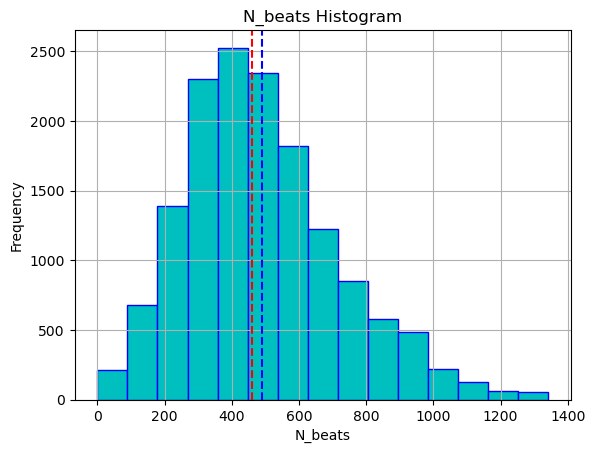

VARIABLE n_bars
0        141.0
1        155.0
2        162.0
3        155.0
4        183.0
         ...  
14995    212.0
14996     92.0
14997    209.0
14998    130.0
14999     72.0
Name: n_bars, Length: 14870, dtype: float64


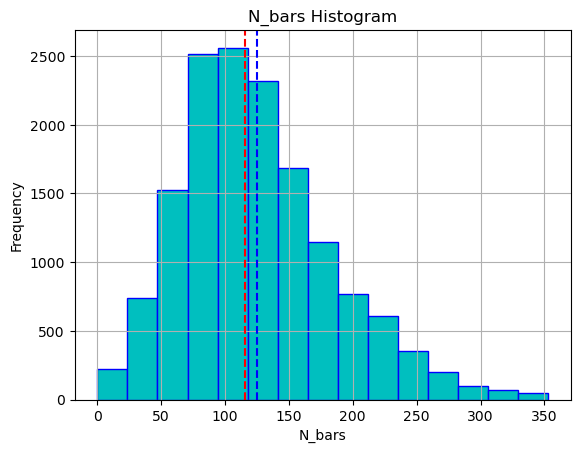

VARIABLE popularity_confidence
Series([], Name: popularity_confidence, dtype: float64)
VARIABLE processing
0        1.279305
1        2.367412
2        3.700483
3        1.279305
4        4.067086
           ...   
14995    2.367412
14996    2.367412
14997    2.367412
14998    1.279305
14999    1.170953
Name: processing, Length: 15000, dtype: float64


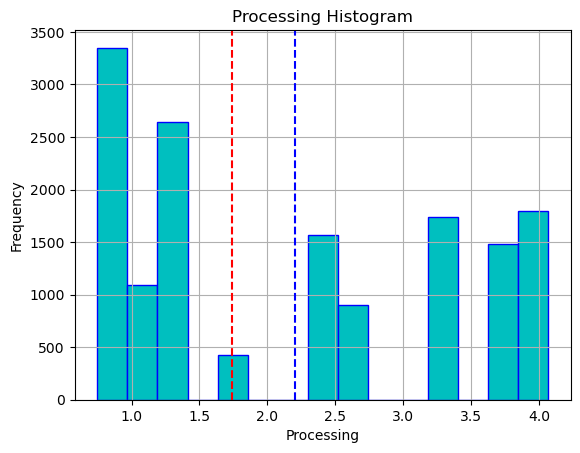

In [72]:
threshold = 3
for x in numcols:
    z_scores = stats.zscore(master[x])
# Create a new DataFrame with the z-scores
    z_score_df = pd.DataFrame({'Z-Score': z_scores})
    
    # Filter the data based on the z-score threshold
    filtered_data = master[x][(z_scores <= threshold) & (z_scores >= -threshold)]
    message = "VARIABLE {}".format(x)    
    print(message)
    print(filtered_data)
    """ plt.scatter(range(len(filtered_data)), filtered_data, s=100,alpha=0.7,color=(0,0.2,0.7))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('Data Point Index')
    plt.ylabel('Z-Score')
    plt.title('Z-Scores of '+str.capitalize(x))
    plt.show() """

    if filtered_data.empty:
        continue
    bins_number = math.ceil(math.log2(filtered_data.size)) + 1
    filtered_data.hist(bins = bins_number, color = 'c', edgecolor = 'b')
    mean_value = filtered_data.mean()
    #mode_value = filtered_data.mode()
    median_value = filtered_data.median()
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(str.capitalize(x) + ' Histogram')
    plt.xlabel(str.capitalize(x))
    plt.ylabel('Frequency')
    plt.axvline(mean_value, color = 'blue', linestyle = 'dashed')
    #plt.axvline(mode_value[0], color='#FF00FF', linestyle = '--')
    plt.axvline(median_value, color = 'red', linestyle = '--')
    plt.show()
